# Machine Learning Project

Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style
plt.style.use('classic')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the dataset
election = pd.read_excel('Election_Data.xlsx',sheet_name=1)

In [3]:
# Checking first 5 rows in the data
election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
# Checking last 5 rows in the data
election.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
# We can observe that there is an unnamed column which need to be dropped as it is not useful for us in future
election = election.drop(['Unnamed: 0'],axis=1)

In [6]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
# To check information of the data
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
# To check datatype of each column
election.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [9]:
# To check summary of data
election.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [10]:
# To check duplicates in the data
dups = election.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [11]:
# Before removing duplicates
election.shape

(1525, 9)

In [12]:
election = election.drop_duplicates()

In [13]:
# After removing duplicates
election.shape

(1517, 9)

In [14]:
# To cheeck null values in data, There are no null values in the data
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [15]:
cat=[]
num=[]
for i in election.columns:
    if election[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [16]:
election[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [17]:
election[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


In [18]:
for column in election.columns:
    if election[column].dtype == 'object':
        print(column.upper(),': ',election[column].nunique())
        print(election[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [19]:
election.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [20]:
# To check null values
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [21]:
# To check data types of data
election.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [22]:
# To check shape of data
election.shape

(1517, 9)

### Univariate Analysis

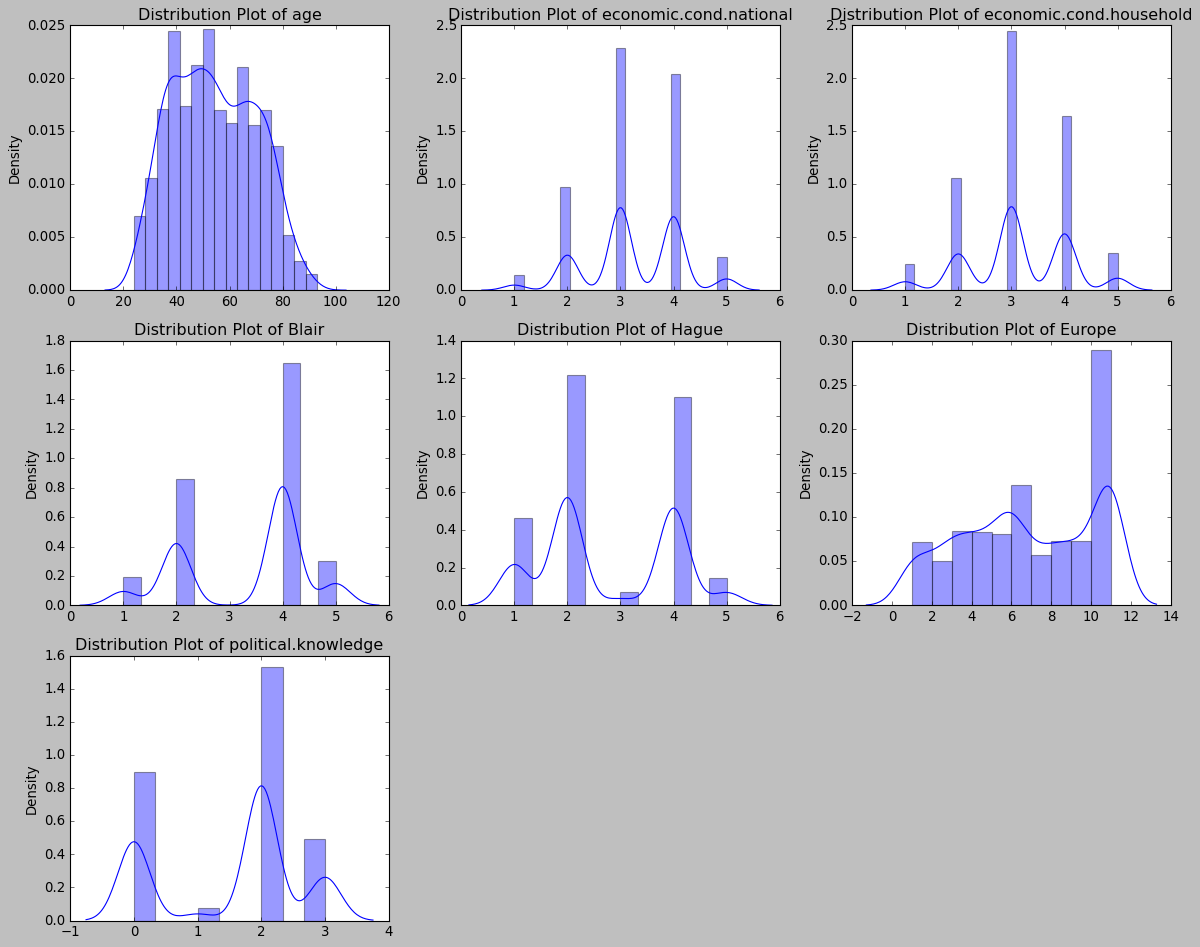

In [23]:
plt.figure(figsize = (15,12))
feature_list = num
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.distplot(x=election[feature_list[i]], color='b',fit = None)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

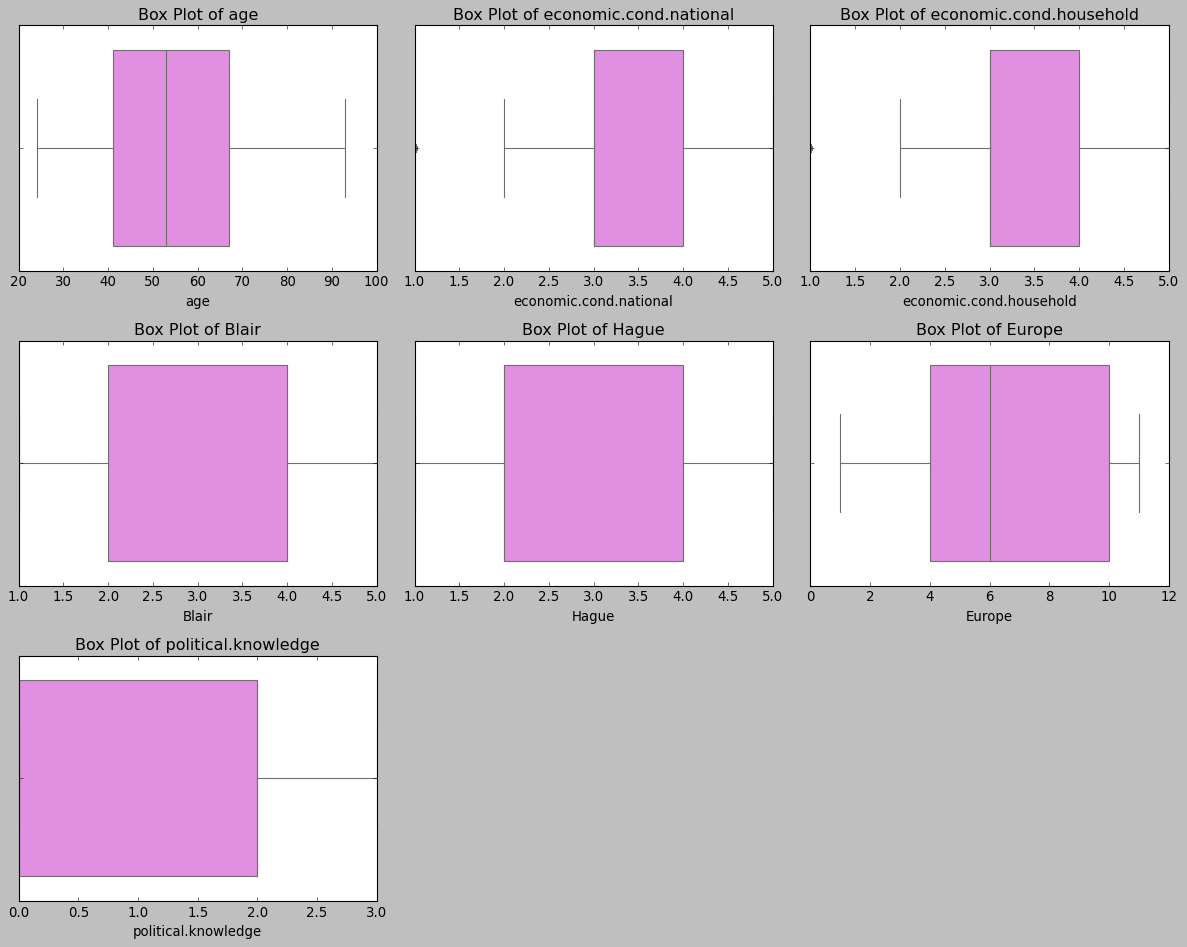

In [24]:
plt.figure(figsize = (15,12))
feature_list = num
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=election[feature_list[i]], color='violet',orient='h')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Bivariate Analysis

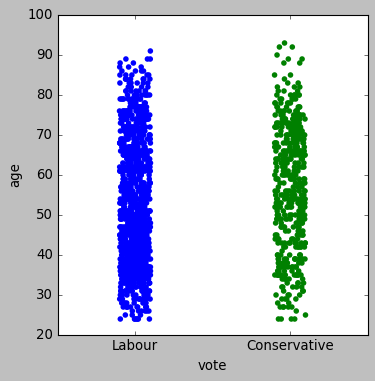

In [25]:
plt.figure(figsize=(5,5))
sns.stripplot(election["vote"], election['age'], jitter=True) 
plt.show()

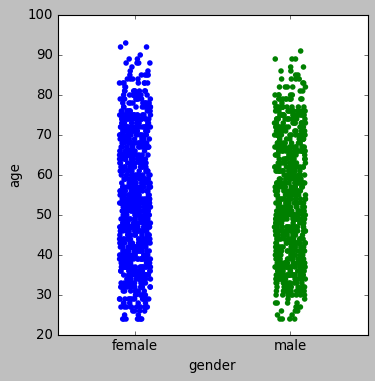

In [26]:
plt.figure(figsize=(5,5))
sns.stripplot(election["gender"], election['age'], jitter=True) 
plt.show()

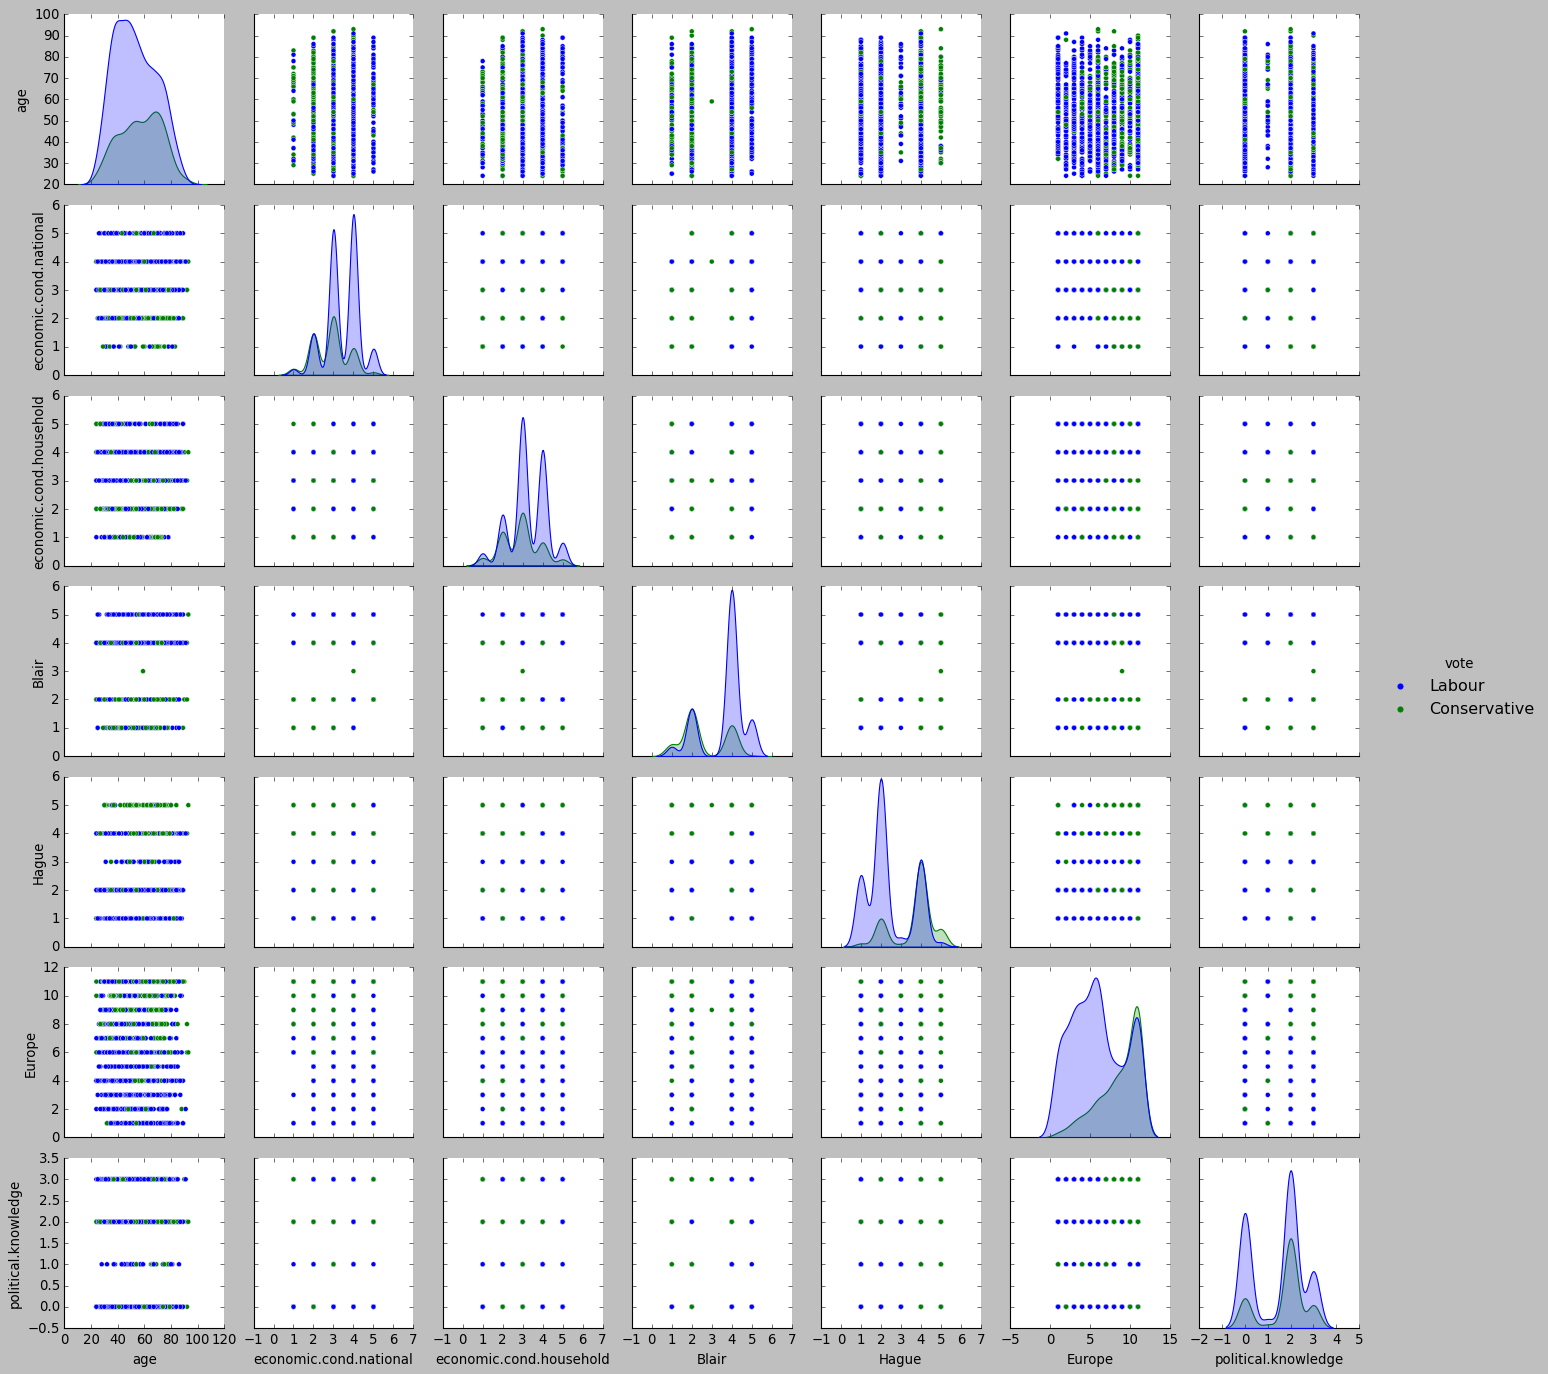

In [27]:
sns.pairplot(election,hue='vote')

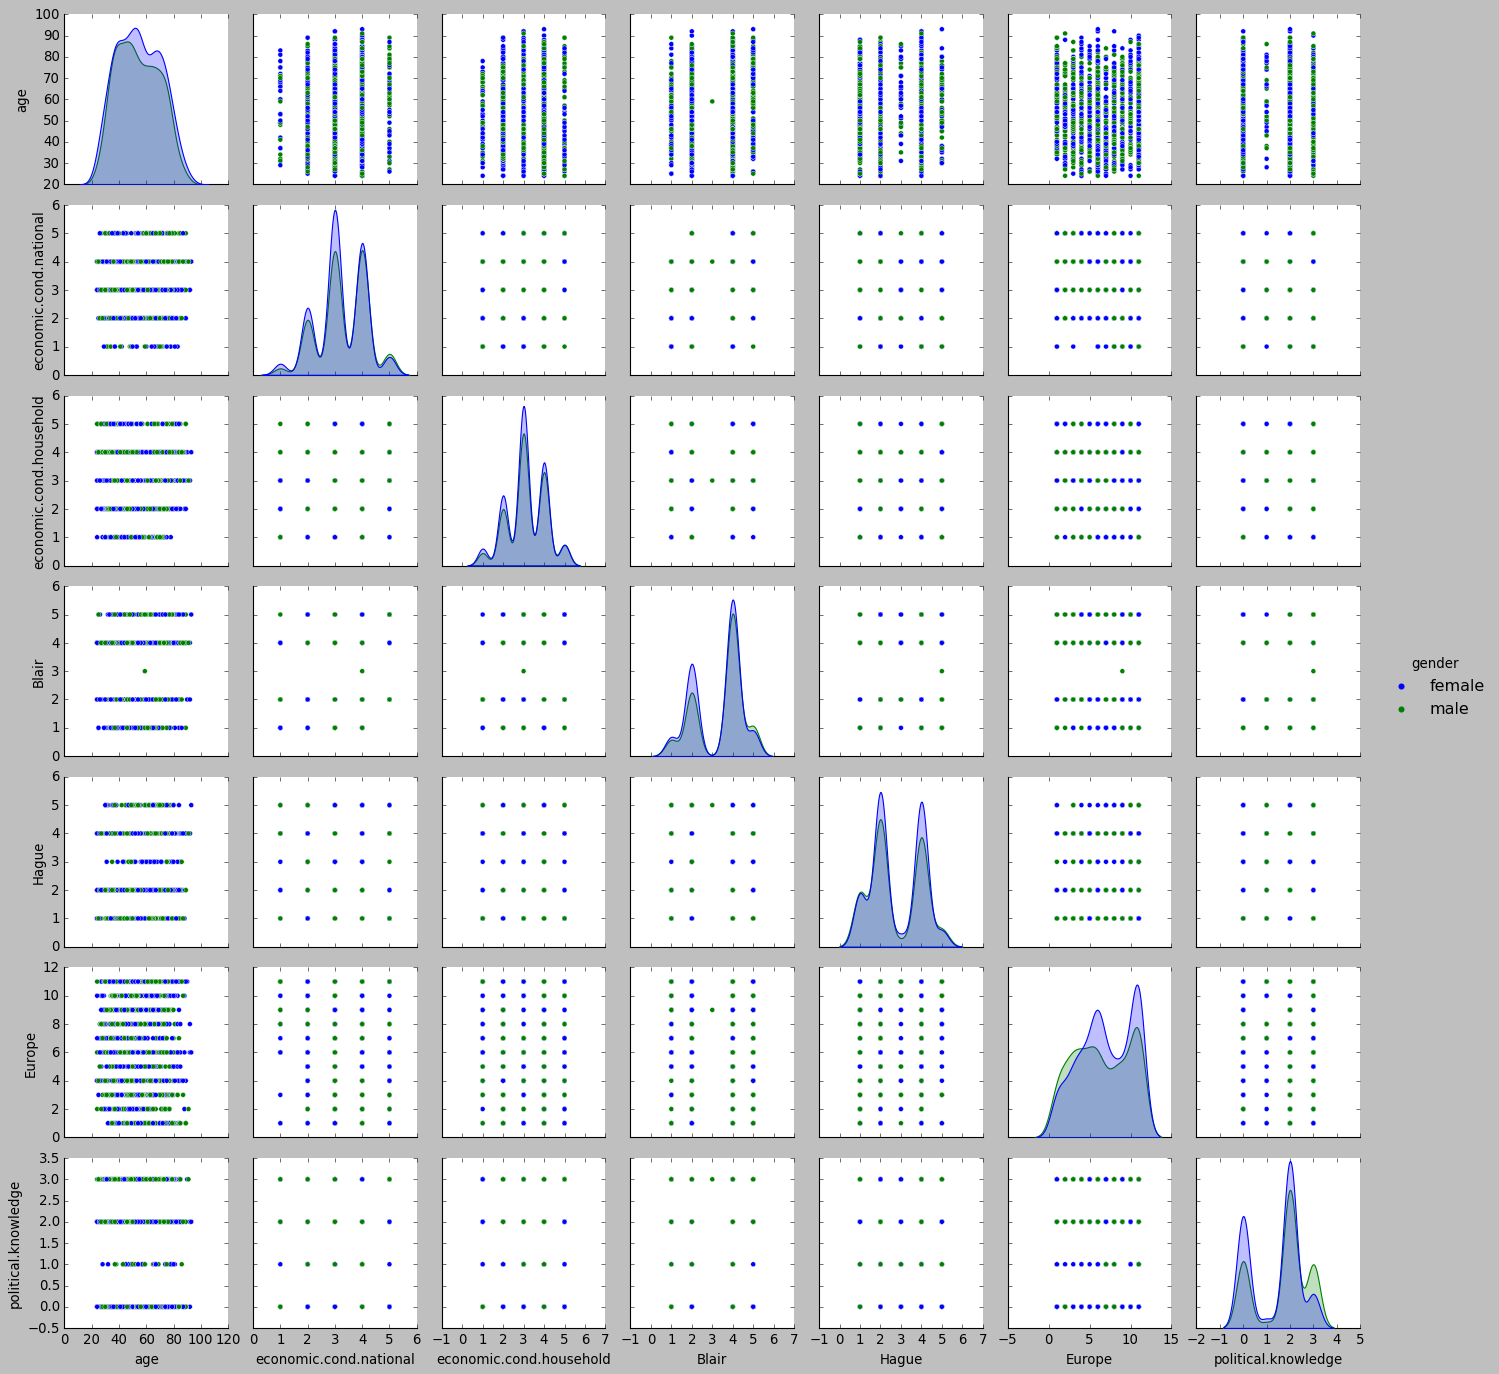

In [28]:
sns.pairplot(election,hue='gender')

<AxesSubplot:xlabel='vote', ylabel='political.knowledge'>

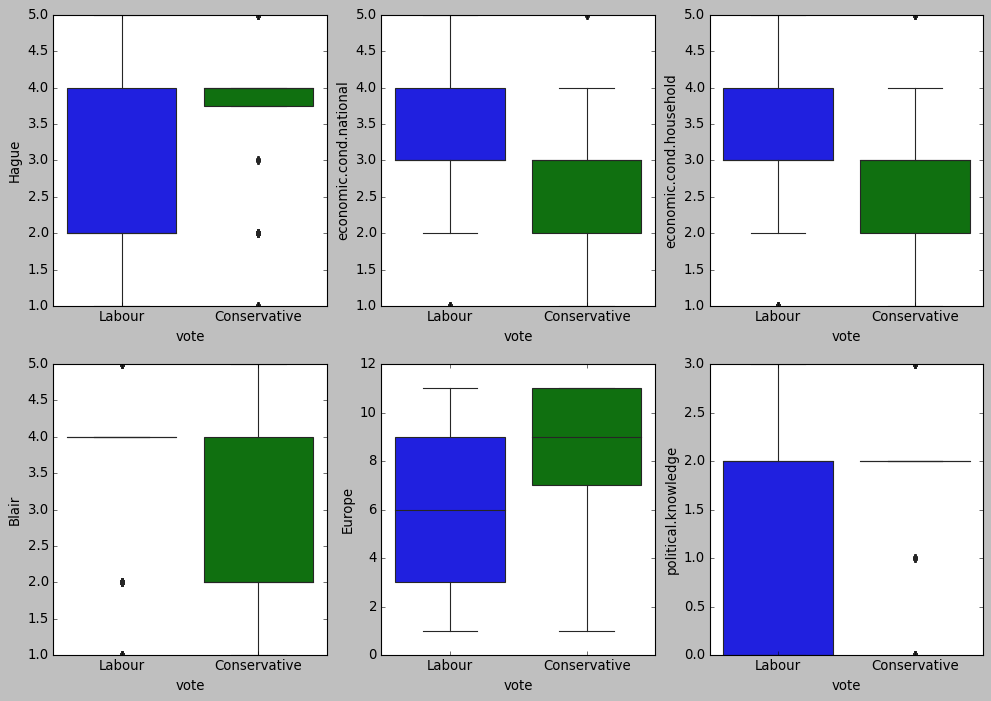

In [29]:
fig,axes = plt.subplots(nrows = 2,ncols = 3)
fig.set_size_inches(15,10)
sns.boxplot(x='vote',y='Hague',data = election,ax=axes[0][0])
sns.boxplot(x='vote',y='economic.cond.national',data = election,ax=axes[0][1])
sns.boxplot(x='vote',y='economic.cond.household',data = election,ax=axes[0][2])
sns.boxplot(x='vote',y='Blair',data = election,ax=axes[1][0])
sns.boxplot(x='vote',y='Europe',data = election,ax=axes[1][1])
sns.boxplot(x='vote',y='political.knowledge',data = election,ax=axes[1][2])

<AxesSubplot:>

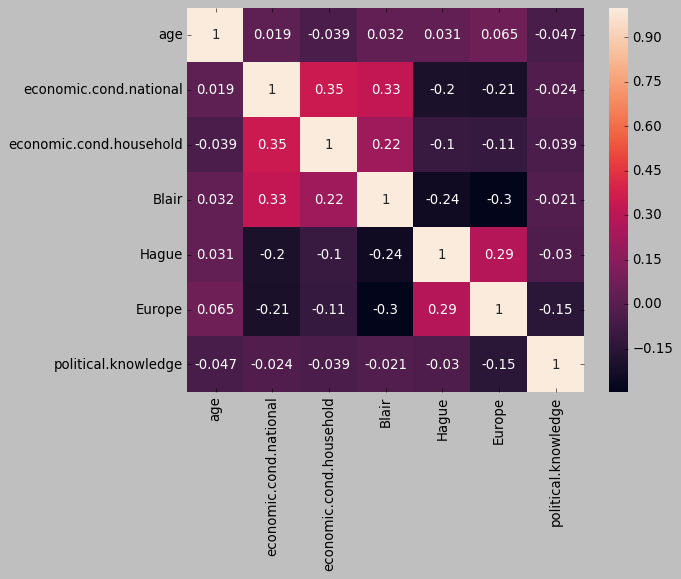

In [30]:
sns.heatmap(election.corr(),annot=True)

<AxesSubplot:>

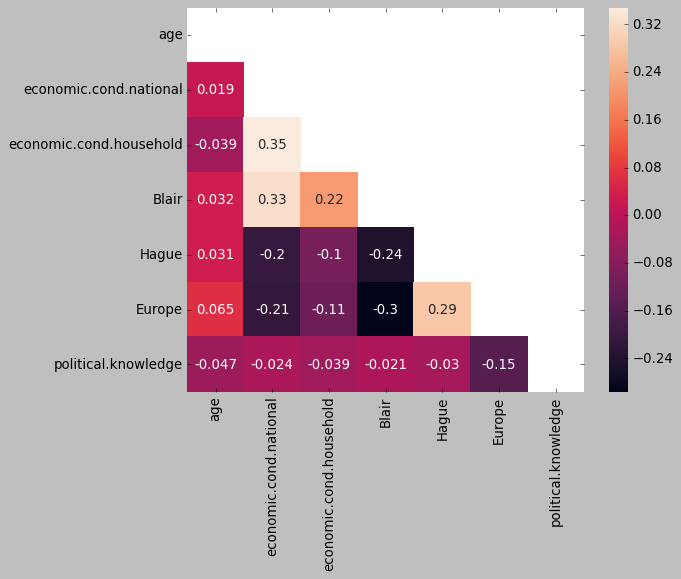

In [31]:
sns.heatmap(election.corr(),annot=True,mask=np.triu(election.corr()))

### Before Treating Outlier

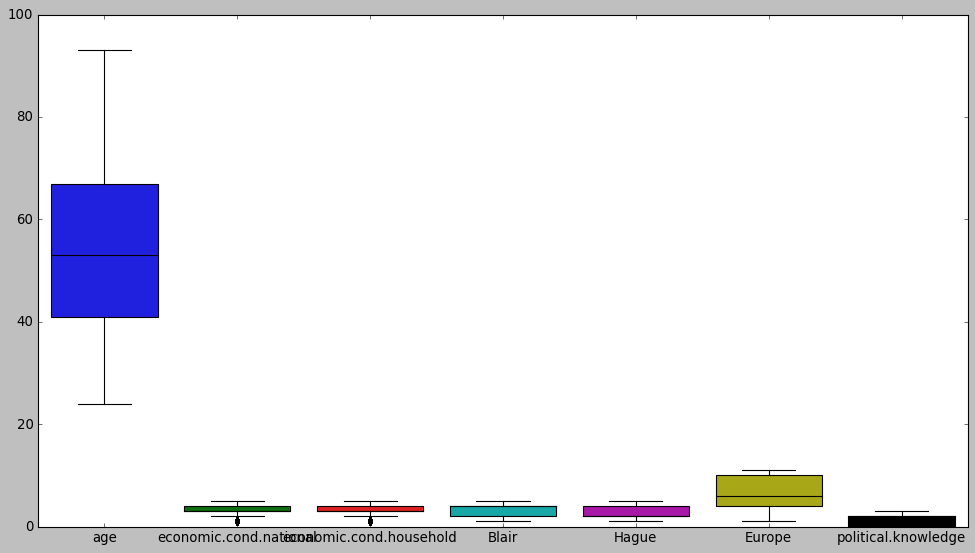

In [32]:
plt.subplots(figsize=(15,8))
sns.boxplot(data=election)
plt.show()

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
for column in num:
    lr,ur=remove_outlier(election[column])
    election[column]=np.where(election[column]>ur,ur,election[column])
    election[column]=np.where(election[column]<lr,lr,election[column])

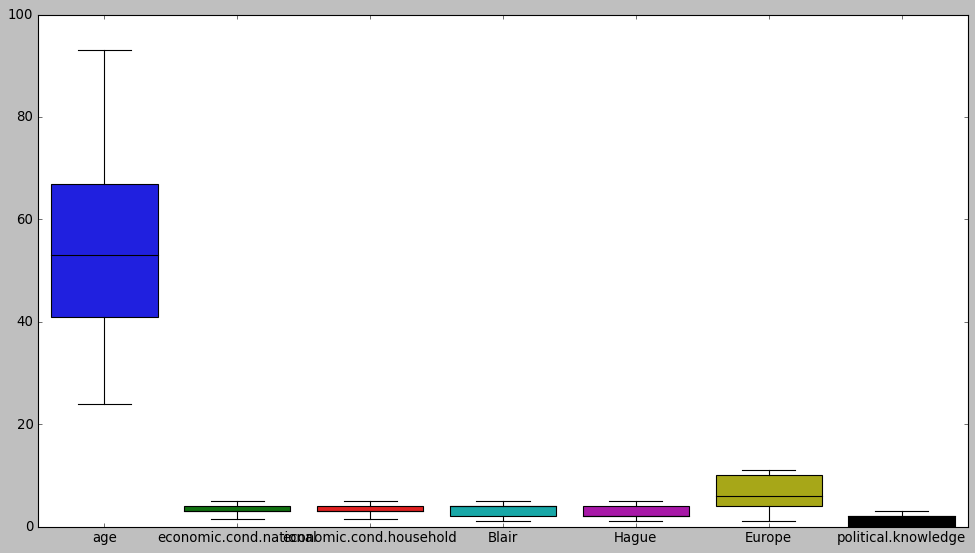

In [35]:
plt.subplots(figsize=(15,8))
sns.boxplot(data=election)
plt.show()

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [36]:
#Converting Object variables to categorical variables:
for feature in cat: 
    if election[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(election[feature].unique()))
        print(pd.Categorical(election[feature].unique()).codes)
        election[feature] = pd.Categorical(election[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [37]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   int8   
 1   age                      1517 non-null   float64
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   float64
 5   Hague                    1517 non-null   float64
 6   Europe                   1517 non-null   float64
 7   political.knowledge      1517 non-null   float64
 8   gender                   1517 non-null   int8   
dtypes: float64(7), int8(2)
memory usage: 130.1 KB


In [38]:
election.vote.value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

In [39]:
# Converting int8 to int64 variables
election['vote'] = election['vote'].astype('float64')
election['gender'] = election['gender'].astype('float64')

In [40]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   float64
 1   age                      1517 non-null   float64
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   float64
 5   Hague                    1517 non-null   float64
 6   Europe                   1517 non-null   float64
 7   political.knowledge      1517 non-null   float64
 8   gender                   1517 non-null   float64
dtypes: float64(9)
memory usage: 150.8 KB


In [41]:
X = election.drop('vote',axis=1)
y = election[['vote']]

## Scaling is need for some models like KNN, Bagging and Boosting. Rest all models we donot need any scaling things

In [42]:
from scipy.stats import zscore
election_scaled = election[['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']].apply(zscore)

In [43]:
X_scaled = election_scaled
y_scaled = election[['vote']]

In [44]:
from sklearn.model_selection import train_test_split
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y_scaled, test_size=0.30 , random_state=1)

In [45]:
X_scaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [47]:
X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
991,34.0,2.0,4.0,1.0,4.0,11.0,2.0,0.0
1274,40.0,4.0,3.0,4.0,4.0,6.0,0.0,1.0
649,61.0,4.0,3.0,4.0,4.0,7.0,2.0,0.0
677,47.0,3.0,3.0,4.0,2.0,11.0,0.0,1.0
538,44.0,5.0,3.0,4.0,2.0,8.0,0.0,1.0
...,...,...,...,...,...,...,...,...
717,52.0,3.0,3.0,4.0,1.0,6.0,2.0,0.0
908,43.0,3.0,4.0,2.0,2.0,9.0,2.0,0.0
1100,74.0,4.0,3.0,5.0,4.0,11.0,0.0,0.0
236,31.0,3.0,3.0,2.0,3.0,6.0,0.0,0.0


In [48]:
y_train.value_counts(normalize=True)

vote
1.0     0.71065
0.0     0.28935
dtype: float64

### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
# Fit the Logistic Regression model
model_log = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model_log.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [51]:
ytrain_predict_log = model_log.predict(X_train)
ytest_predict_log = model_log.predict(X_test)

In [52]:
ytest_predict_prob_log=model_log.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

,0,1
0,0.426549,0.573451
1,0.151457,0.848543
2,0.006491,0.993509
3,0.842674,0.157326
4,0.063533,0.936467


In [53]:
# Accuracy - Training Data
model_log.score(X_train, y_train)

0.8341187558906692

In [54]:
# Accuracy - Testing Data
model_log.score(X_test, y_test)

0.8289473684210527

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [57]:
model_log = LogisticRegression(max_iter=10000,n_jobs=2)

In [58]:
grid_search_log = GridSearchCV(estimator = model_log, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [59]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [60]:
print(grid_search_log.best_params_,'\n')
print(grid_search_log.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [61]:
best_model_log = grid_search_log.best_estimator_

In [62]:
# Prediction on the training set

ytrain_predict_log = best_model_log.predict(X_train)
ytest_predict_log = best_model_log.predict(X_test)

In [63]:
## Getting the probabilities on the test set

ytest_predict_prob_log=best_model_log.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

,0,1
0,0.425885,0.574115
1,0.153040,0.846960
2,0.006706,0.993294
3,0.839472,0.160528
4,0.065117,0.934883


In [64]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



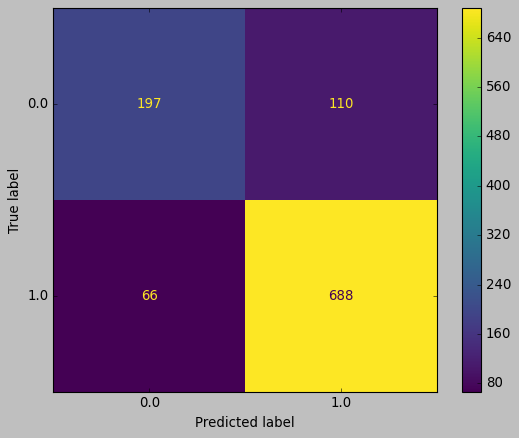

In [65]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model_log,X_train,y_train)
print(classification_report(y_train, ytrain_predict_log),'\n');

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



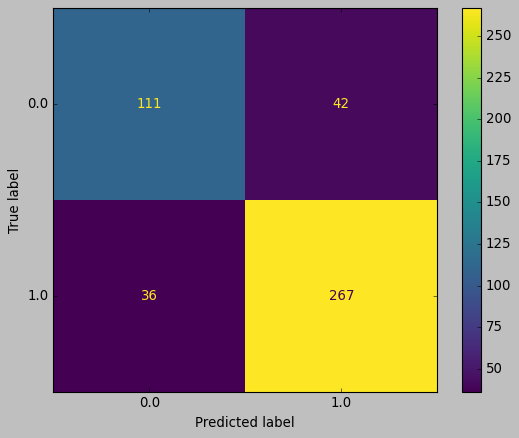

In [66]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_log,X_test,y_test)
print(classification_report(y_test, ytest_predict_log),'\n');

### Linear Discriminant Analysis

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [68]:
#Build LDA Model
clf_log = LinearDiscriminantAnalysis()
model_lda=clf_log.fit(X_train,y_train)

In [69]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_lda = model_lda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_lda = model_lda.predict(X_test)

In [70]:
from sklearn import metrics

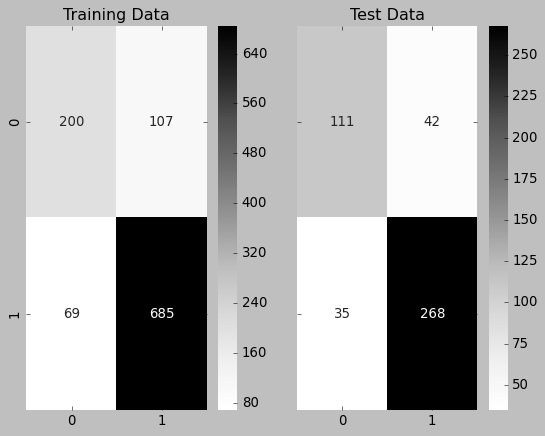

In [71]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [72]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [75]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71       307
         1.0       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [76]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [77]:
NB_model.score(X_train, y_train)

0.8341187558906692

In [78]:
NB_model.score(X_test, y_test)

0.8223684210526315

### KNN Model

In [79]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_scaled,y_train_scaled)

KNeighborsClassifier()

In [80]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_scaled)
model_score_KNN = KNN_model.score(X_train_scaled, y_train_scaled)
print(model_score_KNN)
print(metrics.confusion_matrix(y_train_scaled, y_train_predict_KNN))
print(metrics.classification_report(y_train_scaled, y_train_predict_KNN))

0.8567389255419415
[[217  90]
 [ 62 692]]
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       307
         1.0       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [81]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_test_scaled)
model_score_KNN = KNN_model.score(X_test_scaled, y_test_scaled)
print(model_score_KNN)
print(metrics.confusion_matrix(y_test_scaled, y_test_predict_KNN))
print(metrics.classification_report(y_test_scaled, y_test_predict_KNN))

0.8267543859649122
[[109  44]
 [ 35 268]]
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



In [82]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_scaled)
    # evaluate test accuracy
    scores = knn.score(X_test_scaled, y_test_scaled)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2149122807017544,
 0.19736842105263153,
 0.17324561403508776,
 0.1842105263157895,
 0.18201754385964908,
 0.17105263157894735,
 0.17763157894736847,
 0.16885964912280704,
 0.16666666666666663,
 0.17105263157894735]

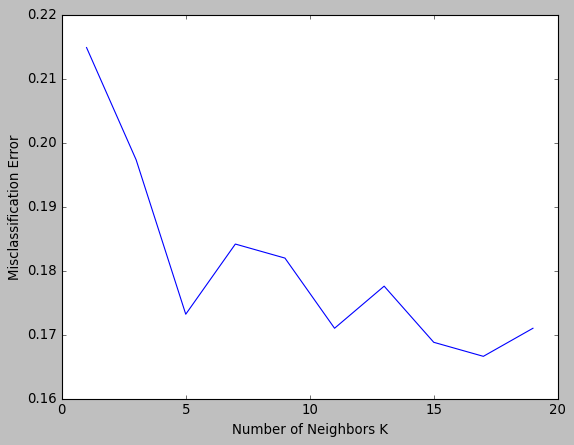

In [83]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [84]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_scaled,y_train_scaled)

KNeighborsClassifier()

In [85]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_scaled)
model_score_KNN = KNN_model.score(X_train_scaled, y_train_scaled)
print(model_score_KNN)
print(metrics.confusion_matrix(y_train_scaled, y_train_predict_KNN))
print(metrics.classification_report(y_train_scaled, y_train_predict_KNN))

0.8567389255419415
[[217  90]
 [ 62 692]]
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       307
         1.0       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [86]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_test_scaled)
model_score_KNN = KNN_model.score(X_test_scaled, y_test_scaled)
print(model_score_KNN)
print(metrics.confusion_matrix(y_test_scaled, y_test_predict_KNN))
print(metrics.classification_report(y_test_scaled, y_test_predict_KNN))

0.8267543859649122
[[109  44]
 [ 35 268]]
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

### Bagging with random forest

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
model_rfcl=RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=50,
                       min_samples_split=80, n_estimators=100)
model_bag=BaggingClassifier(base_estimator=model_rfcl,n_estimators=100,random_state=1)
model_bag.fit(X_train_scaled, y_train_scaled)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=6,
                                                        max_features=5,
                                                        min_samples_leaf=50,
                                                        min_samples_split=80),
                  n_estimators=100, random_state=1)

In [89]:
## Performance Matrix on train data set
y_train_predict_bag = model_bag.predict(X_train_scaled)
model_score_bag =model_bag.score(X_train_scaled, y_train_scaled)
print(model_score_bag)
print(metrics.confusion_matrix(y_train_scaled, y_train_predict_bag))
print(metrics.classification_report(y_train_scaled, y_train_predict_bag))

0.8124410933081998
[[143 164]
 [ 35 719]]
              precision    recall  f1-score   support

         0.0       0.80      0.47      0.59       307
         1.0       0.81      0.95      0.88       754

    accuracy                           0.81      1061
   macro avg       0.81      0.71      0.73      1061
weighted avg       0.81      0.81      0.79      1061



In [90]:
## Performance Matrix on test data set
y_test_predict_bag = model_bag.predict(X_test_scaled)
model_score_bag = model_bag.score(X_test_scaled, y_test_scaled)
print(model_score_bag)
print(metrics.confusion_matrix(y_test_scaled, y_test_predict_bag))
print(metrics.classification_report(y_test_scaled, y_test_predict_bag))

0.7982456140350878
[[ 75  78]
 [ 14 289]]
              precision    recall  f1-score   support

         0.0       0.84      0.49      0.62       153
         1.0       0.79      0.95      0.86       303

    accuracy                           0.80       456
   macro avg       0.82      0.72      0.74       456
weighted avg       0.81      0.80      0.78       456



### Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
grid_search_gbcl = {"criterion" : ['friedman_mse',"mse"],"loss":['exponential'],"max_features":[5,6,7],
                                "min_samples_split":[20,40,30],"n_estimators":[100,200]}

In [93]:
model_gbcl = GradientBoostingClassifier(random_state=1)

In [94]:
grid_search_gbcl = GridSearchCV(estimator = model_gbcl, param_grid = grid_search_gbcl, cv = 7,n_jobs=-1,scoring='accuracy')

In [95]:
grid_search_gbcl.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'loss': ['exponential'], 'max_features': [5, 6, 7],
                         'min_samples_split': [20, 40, 30],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [96]:
print(grid_search_gbcl.best_params_,'\n')
print(grid_search_gbcl.best_estimator_)

{'criterion': 'mse', 'loss': 'exponential', 'max_features': 5, 'min_samples_split': 30, 'n_estimators': 100} 

GradientBoostingClassifier(criterion='mse', loss='exponential', max_features=5,
                           min_samples_split=30, random_state=1)


In [97]:
best_model_gbcl = grid_search_gbcl.best_estimator_

In [98]:
## Performance Matrix on train data set
y_train_predict_gbcl = best_model_gbcl.predict(X_train_scaled)
model_score_gbcl = best_model_gbcl.score(X_train_scaled, y_train_scaled)
print(model_score_gbcl)
print(metrics.confusion_matrix(y_train_scaled, y_train_predict_gbcl))
print(metrics.classification_report(y_train_scaled, y_train_predict_gbcl))

0.885956644674835
[[230  77]
 [ 44 710]]
              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79       307
         1.0       0.90      0.94      0.92       754

    accuracy                           0.89      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.88      0.89      0.88      1061



In [99]:
## Performance Matrix on test data set
y_test_predict_gbcl = best_model_gbcl.predict(X_test_scaled)
model_score_gbcl = best_model_gbcl.score(X_test_scaled, y_test_scaled)
print(model_score_gbcl)
print(metrics.confusion_matrix(y_test_scaled, y_test_predict_gbcl))
print(metrics.classification_report(y_test_scaled, y_test_predict_gbcl))

0.8377192982456141
[[109  44]
 [ 30 273]]
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75       153
         1.0       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

### Logistic Regression Model Metrics

              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



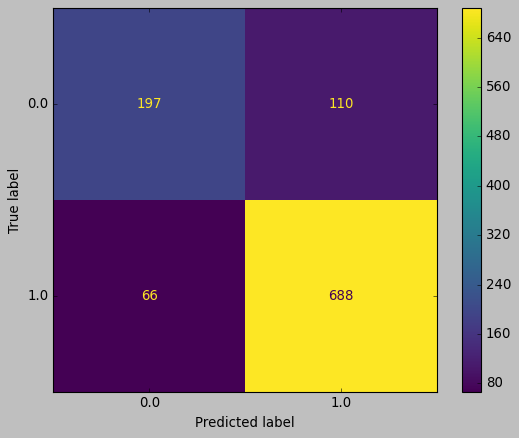

In [100]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model_log,X_train,y_train)
print(classification_report(y_train, ytrain_predict_log),'\n');

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



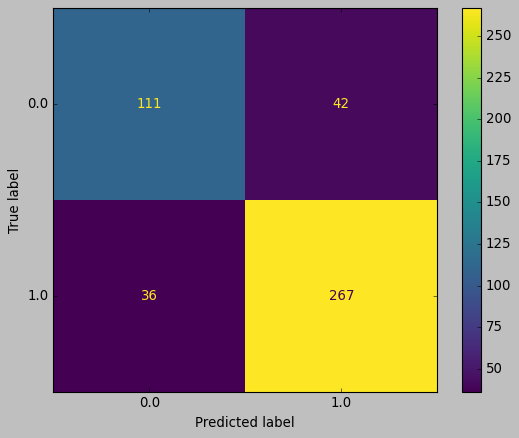

In [101]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_log,X_test,y_test)
print(classification_report(y_test, ytest_predict_log),'\n');

AUC: 0.890


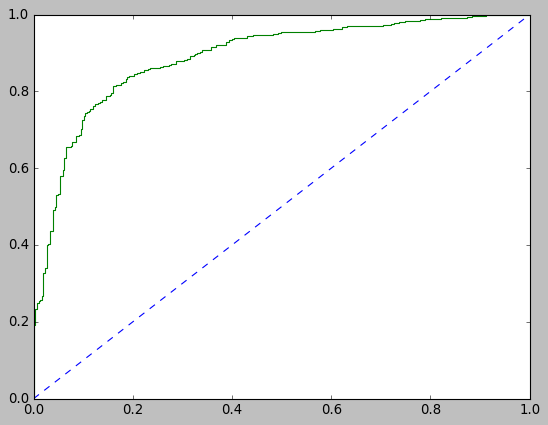

In [102]:
# predict probabilities
probs_log = best_model_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_log = probs_log[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_log)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_log)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.890


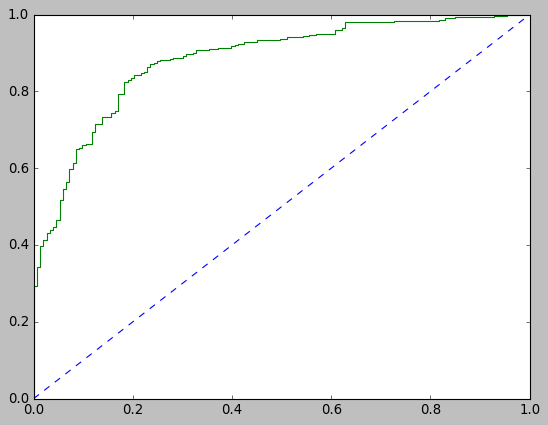

In [103]:
# predict probabilities
probs_log = best_model_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_log = probs_log[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_log)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_log)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### LDA model metrics

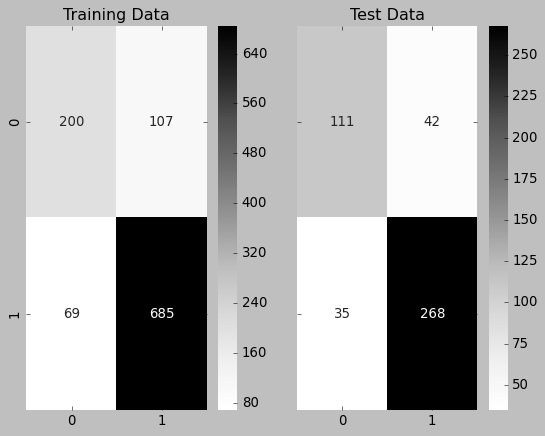

In [104]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [105]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC: 0.890


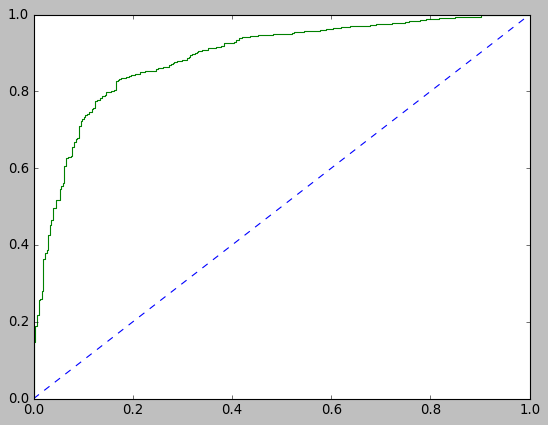

In [106]:
# predict probabilities
probs_lda = model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_lda = probs_lda[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_lda)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.890


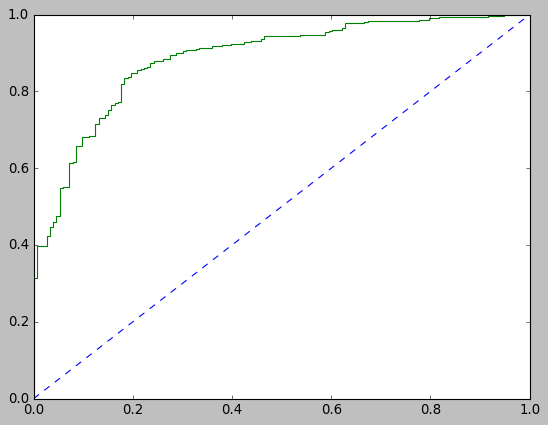

In [107]:
# predict probabilities
probs_lda = model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_lda = probs_lda[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_lda)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Naive Bayes Model Metrics

In [108]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71       307
         1.0       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [109]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.889


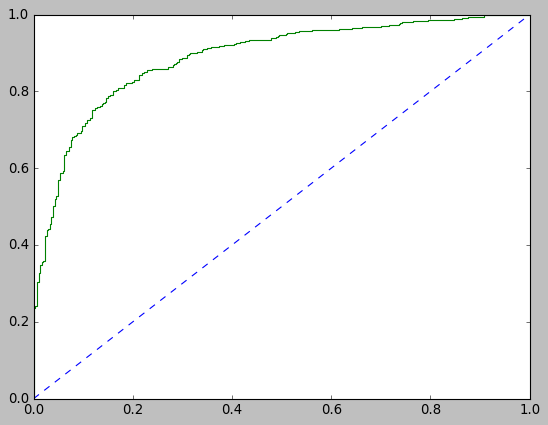

In [110]:
# predict probabilities
probs_NB = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_NB = probs_NB[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_NB)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_NB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.889


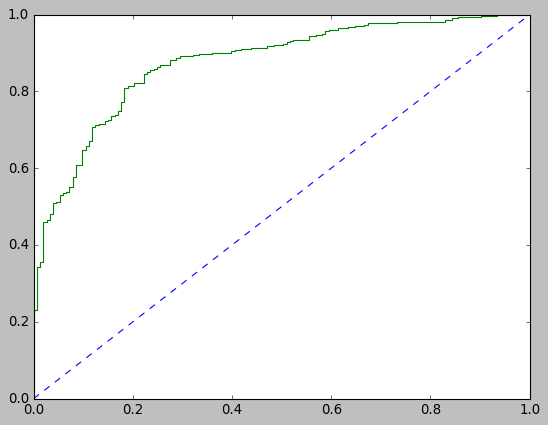

In [111]:
# predict probabilities
probs_NB = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_NB = probs_NB[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_NB)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_NB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### KNN Model Performance metrics, AUC, ROC

In [112]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_scaled)
model_score_KNN = KNN_model.score(X_train_scaled, y_train_scaled)
print(model_score_KNN)
print(metrics.confusion_matrix(y_train_scaled, y_train_predict_KNN))
print(metrics.classification_report(y_train_scaled, y_train_predict_KNN))

0.8567389255419415
[[217  90]
 [ 62 692]]
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       307
         1.0       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [113]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_test_scaled)
model_score_KNN = KNN_model.score(X_test_scaled, y_test_scaled)
print(model_score_KNN)
print(metrics.confusion_matrix(y_test_scaled, y_test_predict_KNN))
print(metrics.classification_report(y_test_scaled, y_test_predict_KNN))

0.8267543859649122
[[109  44]
 [ 35 268]]
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



AUC: 0.929


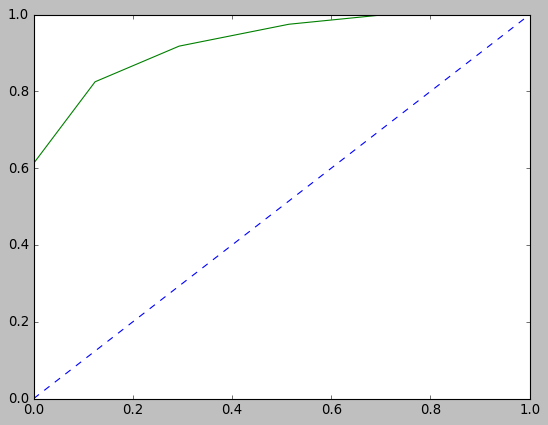

In [114]:
# predict probabilities
probs_KNN = KNN_model.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs_KNN = probs_KNN[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_scaled, probs_KNN)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_scaled, probs_KNN)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.929


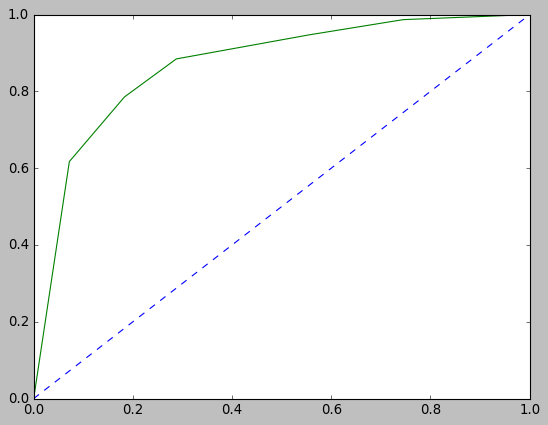

In [115]:
# predict probabilities
probs_KNN = KNN_model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs_KNN = probs_KNN[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test_scaled, probs_KNN)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_scaled, probs_KNN)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Bagging Model Performance metrics, AUC, ROC

In [116]:
## Performance Matrix on train data set
y_train_predict_bag = model_bag.predict(X_train_scaled)
model_score_bag =model_bag.score(X_train_scaled, y_train_scaled)
print(model_score_bag)
print(metrics.confusion_matrix(y_train_scaled, y_train_predict_bag))
print(metrics.classification_report(y_train_scaled, y_train_predict_bag))

0.8124410933081998
[[143 164]
 [ 35 719]]
              precision    recall  f1-score   support

         0.0       0.80      0.47      0.59       307
         1.0       0.81      0.95      0.88       754

    accuracy                           0.81      1061
   macro avg       0.81      0.71      0.73      1061
weighted avg       0.81      0.81      0.79      1061



In [117]:
## Performance Matrix on test data set
y_test_predict_bag = model_bag.predict(X_test_scaled)
model_score_bag = model_bag.score(X_test_scaled, y_test_scaled)
print(model_score_bag)
print(metrics.confusion_matrix(y_test_scaled, y_test_predict_bag))
print(metrics.classification_report(y_test_scaled, y_test_predict_bag))

0.7982456140350878
[[ 75  78]
 [ 14 289]]
              precision    recall  f1-score   support

         0.0       0.84      0.49      0.62       153
         1.0       0.79      0.95      0.86       303

    accuracy                           0.80       456
   macro avg       0.82      0.72      0.74       456
weighted avg       0.81      0.80      0.78       456



AUC: 0.881


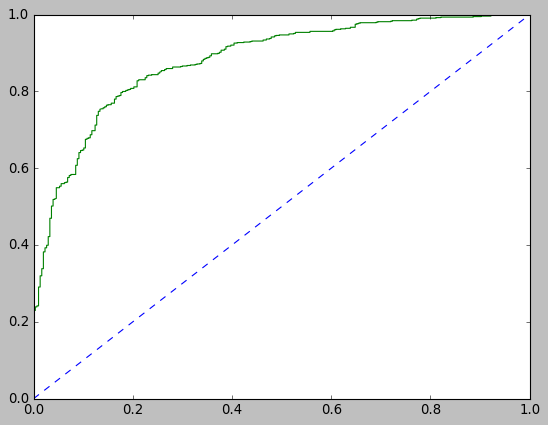

In [118]:
# predict probabilities
probs_bag = model_bag.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs_bag = probs_bag[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_scaled, probs_bag)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_scaled, probs_bag)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.881


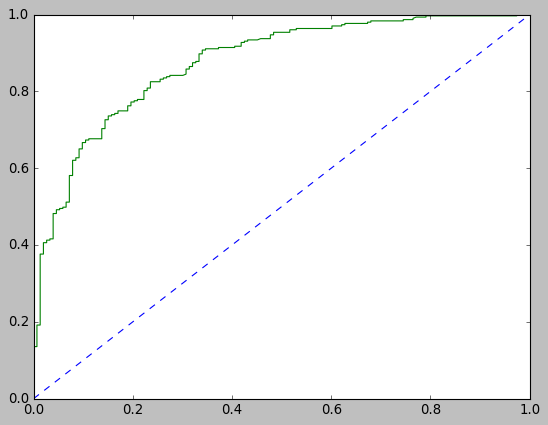

In [119]:
# predict probabilities
probs_bag = model_bag.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs_bag = probs_bag[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test_scaled, probs_bag)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_scaled, probs_bag)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Gradient Boosting Model Performance metrics, AUC, ROC

In [120]:
## Performance Matrix on train data set
y_train_predict_gbcl = best_model_gbcl.predict(X_train_scaled)
model_score_gbcl = best_model_gbcl.score(X_train_scaled, y_train_scaled)
print(model_score_gbcl)
print(metrics.confusion_matrix(y_train_scaled, y_train_predict_gbcl))
print(metrics.classification_report(y_train_scaled, y_train_predict_gbcl))

0.885956644674835
[[230  77]
 [ 44 710]]
              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79       307
         1.0       0.90      0.94      0.92       754

    accuracy                           0.89      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.88      0.89      0.88      1061



In [121]:
## Performance Matrix on test data set
y_test_predict_gbcl = best_model_gbcl.predict(X_test_scaled)
model_score_gbcl = best_model_gbcl.score(X_test_scaled, y_test_scaled)
print(model_score_gbcl)
print(metrics.confusion_matrix(y_test_scaled, y_test_predict_gbcl))
print(metrics.classification_report(y_test_scaled, y_test_predict_gbcl))

0.8377192982456141
[[109  44]
 [ 30 273]]
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75       153
         1.0       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.947


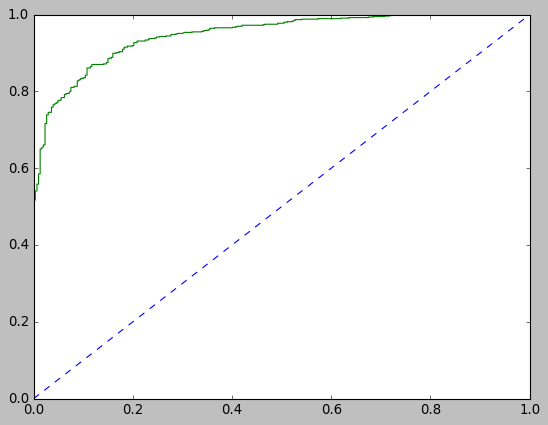

In [122]:
# predict probabilities
probs_gbcl = best_model_gbcl.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs_gbcl = probs_gbcl[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_scaled, probs_gbcl)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_scaled, probs_gbcl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.947


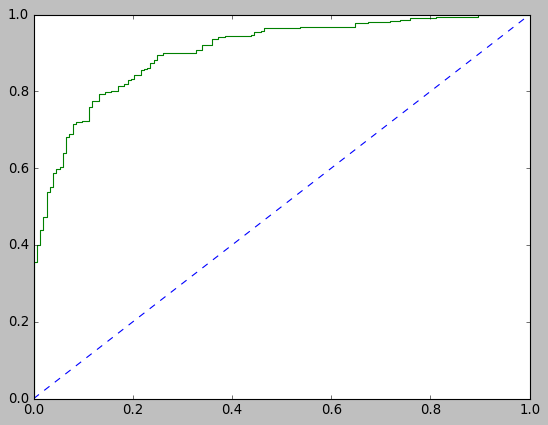

In [123]:
# predict probabilities
probs_gbcl = best_model_gbcl.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs_gbcl = probs_gbcl[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test_scaled, probs_gbcl)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_scaled, probs_gbcl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

In [124]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [125]:
import nltk
import wordcloud
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to C:\Users\PAVAN KALYAN
[nltk_data]     B\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [126]:
col = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural = pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=col)

In [127]:
inaugural.head()

,president,text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

### Number of Words

In [128]:
inaugural['word_length'] = inaugural['text'].apply(lambda x: len(str(x).split(" ")))
inaugural

,president,text,word_length
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


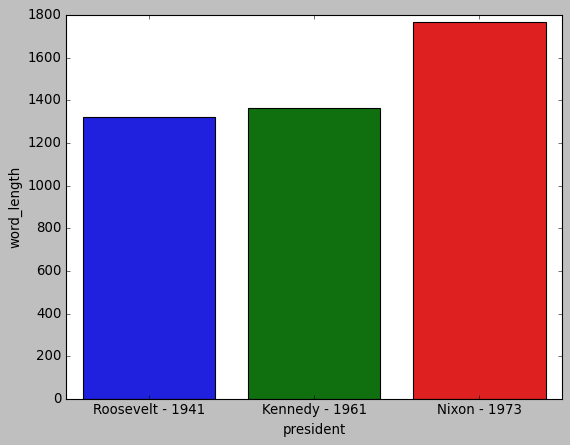

In [129]:
import seaborn as sns
sns.barplot(x=inaugural['president'],y=inaugural['word_length']);

### Number of Characters

In [130]:
inaugural['character_length'] = inaugural['text'].str.len()
inaugural

,president,text,word_length,character_length
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991


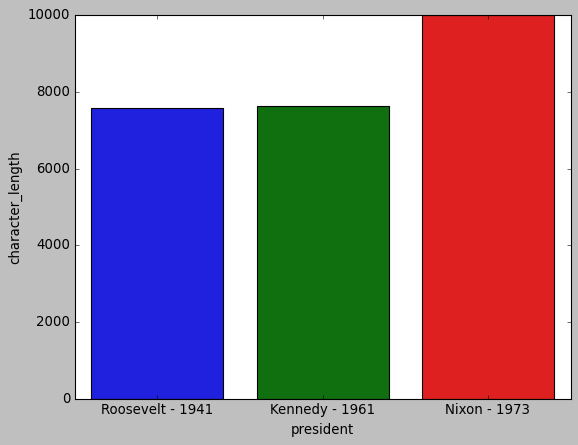

In [131]:
sns.barplot(x=inaugural['president'],y=inaugural['character_length']);

### Number of sentences

In [132]:
from nltk.tokenize import sent_tokenize

In [133]:
inaugural['sentence_length'] = inaugural['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural

,president,text,word_length,character_length,sentence_length
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68


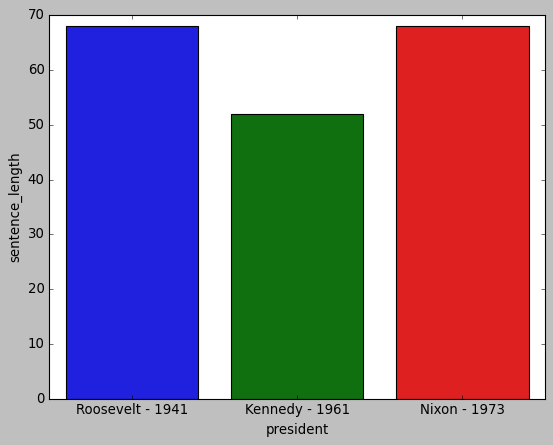

In [134]:
sns.barplot(x=inaugural['president'],y=inaugural['sentence_length']);

### 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

### Lower Case Conversion

In [135]:
inaugural['text'] = inaugural['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural['text'].head()

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

### Removal of punctuation

In [136]:
inaugural['text'] = inaugural['text'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
inaugural['text'].head()

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

### Removal of Stopwords

In [137]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
inaugural['text'] = inaugural['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
inaugural['text'].head()

1941-Roosevelt    national day inauguration since 1789 people re...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [138]:
inaugural

,president,text,word_length,character_length,sentence_length
1941-Roosevelt,Roosevelt - 1941,national day inauguration since 1789 people re...,1323,7571,68
1961-Kennedy,Kennedy - 1961,vice president johnson mr speaker mr chief jus...,1364,7618,52
1973-Nixon,Nixon - 1973,mr vice president mr speaker mr chief justice ...,1769,9991,68


### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [139]:
freq1 = pd.Series(' '.join(inaugural.iloc[0:1,1]).split()).value_counts()[:3]
freq1

nation       11
know         10
democracy     9
dtype: int64

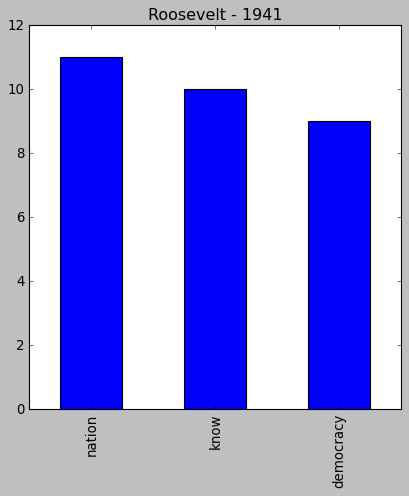

In [140]:
plt.figure(figsize=(6,6))
ax = freq1.plot(kind='bar');
plt.title('Roosevelt - 1941');

In [141]:
freq2 = pd.Series(' '.join(inaugural.iloc[1:2,1]).split()).value_counts()[:3]
freq2

let      16
us       12
sides     8
dtype: int64

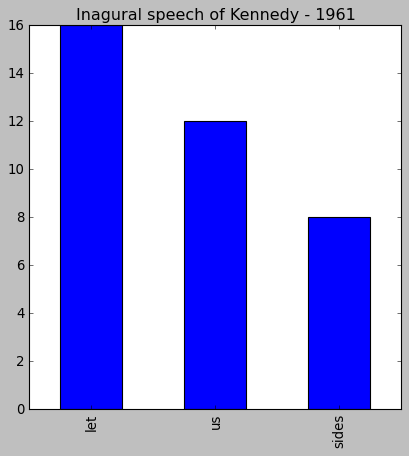

In [142]:
plt.figure(figsize=(6,6))
ax = freq2.plot(kind='bar');
plt.title('Inagural speech of Kennedy - 1961');

In [143]:
freq3 = pd.Series(' '.join(inaugural.iloc[2:3,1]).split()).value_counts()[:3]
freq3

us       26
let      22
peace    19
dtype: int64

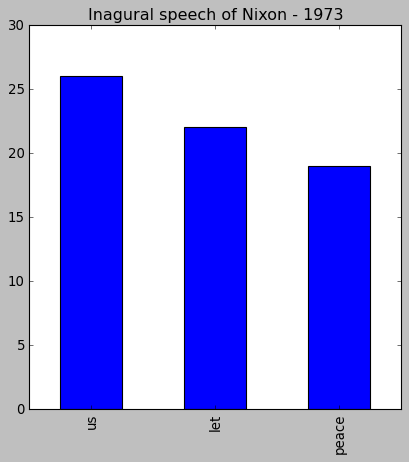

In [144]:
plt.figure(figsize=(6,6))
ax = freq3.plot(kind='bar');
plt.title('Inagural speech of Nixon - 1973');

## --------------------------------------------------------------------------------------------------------------------------------------